# Newton method
*CYBR 304* <br>
_Spring 2024_ <br>


The Julia code from our textbook for the Newton method is

In [ ]:
function newton(f::Function,fprime::Function,pin,eps,N)
    n=1
    p=0. # to ensure the value of p carries out of the while loop
    while n<=N
        p=pin-f(pin)/fprime(pin)
        if f(p)==0 || abs(p-pin)<eps
            return println("p is $p and the iteration number is $n")
        end
        pin=p
        n=n+1
    end
    y=f(p)
    println("Method did not converge. The last iteration gives $p with 
        function value $y")
end

In [54]:
function newton(f::Function,x0::Number, tol::Number=64*eps(x0), maxiter::Int64 = 50)
    df = x -> ForwardDiff.derivative(f,x)
    done = false
    while maxiter > 0 && !done
        x1 = x0 - f(x0)/df(x0)
        done = isapprox(x0,x1,atol=tol, rtol=tol)
        x0 = x1
        maxiter -= 1
    end
    maxiter <= 0 &&  error("Newton sequence converges to slowly")
    x0
end

newton (generic function with 3 methods)

In [56]:
F = x-> x^5+2*x^3-5*x-2

#59 (generic function with 1 method)

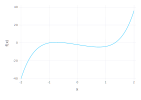

In [57]:
plot(F,-2,2)

In [58]:
newton(F,-3.0)

-1.0

In [59]:
newton(F,-0.5)

-0.4364131329990945

In [60]:
newton(F,2.0)

1.3196411672093118

The following example (from https://en.wikipedia.org/wiki/Newton%27s_method) shows that the Newton method sometimes
almost seems that it has a mind of its own. Let's define a third degree polynomial that has three real roots of -3,1, 
and 4.  We'll apply the Newton method with initial values that are all close to 2.3.  You might guess that the each Newton sequence will converge to the nearest root of 1. But wait!

In [70]:
F = x -> (x-4)*(x-1)*(x+3)

#63 (generic function with 1 method)

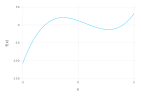

In [74]:
plot(F,-5,5)

In [75]:
newton(F,2.35287527)

4.0

In [76]:
newton(F,2.35284172)

-3.0

In [77]:
newton(F,2.35283735)

4.0

In [68]:
newton(F,2.352836327)

-3.0

In [69]:
newton(F,2.352836323)

1.0